In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\LENOVO\Downloads\application_data.csv')
loan = pd.read_csv(r'C:\Users\LENOVO\Downloads\previous_application.csv')

# importing libraries

In [2]:
data['NAME_CONTRACT_STATUS'] =pd.Series(loan['NAME_CONTRACT_STATUS'])

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Refused


# data conditioning

In [4]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_CONTRACT_STATUS'],
      dtype='object', length=123)

In [5]:
loan.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [6]:
round(data.isnull().sum()/len(data.index), 2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    14.0
AMT_REQ_CREDIT_BUREAU_MON     14.0
AMT_REQ_CREDIT_BUREAU_QRT     14.0
AMT_REQ_CREDIT_BUREAU_YEAR    14.0
NAME_CONTRACT_STATUS           0.0
Length: 123, dtype: float64

In [ ]:
#treating missing values

In [7]:
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 90]
print(missing_columns)

Index([], dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to NAME_CONTRACT_STATUS
dtypes: float64(65), int64(41), object(17)
memory usage: 288.6+ MB


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [10]:
100*(data[data['TARGET']==1].count()/data['TARGET'].count())

SK_ID_CURR                    8.072882
TARGET                        8.072882
NAME_CONTRACT_TYPE            8.072882
CODE_GENDER                   8.072882
FLAG_OWN_CAR                  8.072882
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    6.677160
AMT_REQ_CREDIT_BUREAU_MON     6.677160
AMT_REQ_CREDIT_BUREAU_QRT     6.677160
AMT_REQ_CREDIT_BUREAU_YEAR    6.677160
NAME_CONTRACT_STATUS          8.072882
Length: 123, dtype: float64

# dividing  data on the basis of  target variable

In [11]:
df1=data[data['TARGET']==1]

In [12]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Approved
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Approved
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Approved
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Refused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Approved
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0,Approved
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,Canceled
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,Canceled


In [13]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Approved
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Approved
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Approved
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Approved
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Refused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Approved
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0,Approved
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,Canceled
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,Canceled


In [14]:
df2=data[data['TARGET']==0]

In [15]:
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Approved
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Refused
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,Refused
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Canceled
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,Approved


# DATA ANALYSIS

In [16]:
data.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [17]:
df1.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005151,...,-0.009181,-0.006382,0.003781,0.006932,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,...,0.004333,-0.001370,-0.002395,0.001136,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,...,-0.002177,-0.000371,-0.000450,-0.000647,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,-0.000968,...,0.011174,0.013442,0.016949,-0.021964,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.007954,NaN,-0.013004,-0.000272,0.003008,-0.000294,0.004280,-0.005483,-0.007248,0.021363,...,0.005703,-0.001744,-0.001896,-0.001822,0.246741,1.000000,0.184098,-0.012627,0.000789,0.001239
AMT_REQ_CREDIT_BUREAU_WEEK,-0.002999,NaN,-0.011792,0.000018,0.007650,0.031242,0.007980,0.002904,-0.005537,0.014720,...,-0.007416,-0.003964,-0.004310,-0.004141,0.006232,0.184098,1.000000,-0.011994,-0.010151,0.016838
AMT_REQ_CREDIT_BUREAU_MON,0.006436,NaN,-0.012583,0.004114,0.055038,0.053413,0.058558,0.071329,-0.005713,-0.025738,...,0.012550,-0.007082,0.000096,-0.007397,-0.007871,-0.012627,-0.011994,1.000000,-0.001365,-0.002559
AMT_REQ_CREDIT_BUREAU_QRT,-0.000880,NaN,-0.018174,-0.001133,-0.017467,-0.010205,-0.016024,-0.007299,-0.017214,0.014982,...,-0.004834,-0.002809,0.001868,-0.000373,0.006584,0.000789,-0.010151,-0.001365,1.000000,0.101756


In [18]:
df2.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,...,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,...,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.001725,NaN,0.000648,0.007862,0.004409,0.002392,0.004820,0.001969,0.002772,-0.000802,...,0.013823,0.001341,0.000028,-0.001073,0.229065,1.000000,0.220087,-0.004753,-0.004749,-0.003798
AMT_REQ_CREDIT_BUREAU_WEEK,0.002524,NaN,-0.001632,0.006234,-0.001883,0.012681,-0.001597,-0.002480,-0.001069,0.002304,...,-0.004443,-0.001068,-0.001550,0.000571,0.004576,0.220087,1.000000,-0.014248,-0.015466,0.019085
AMT_REQ_CREDIT_BUREAU_MON,0.000054,NaN,-0.010455,0.061470,0.054071,0.038181,0.055850,0.078629,0.002855,-0.035564,...,-0.002460,-0.002476,0.001379,-0.003246,0.000528,-0.004753,-0.014248,1.000000,-0.008160,-0.004889
AMT_REQ_CREDIT_BUREAU_QRT,0.001148,NaN,-0.007087,0.013128,0.017767,0.011248,0.018163,-0.001013,-0.011335,0.015288,...,-0.005158,-0.001503,-0.001212,-0.002175,-0.003350,-0.004749,-0.015466,-0.008160,1.000000,0.074664


NameError: name 'x_labels' is not defined

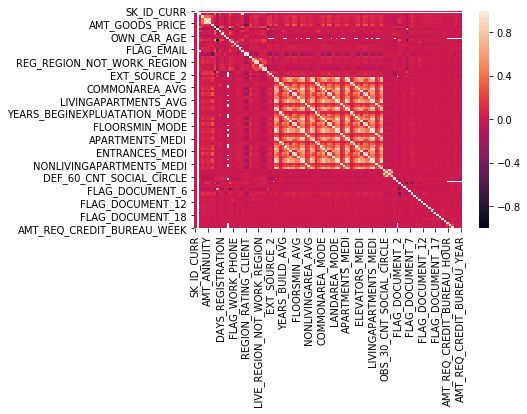

In [19]:
ax=sns.heatmap(df2.corr())
ax.set_xticks([x_to_num[v] for v in x_labels])
ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
ax.set_yticks([y_to_num[v] for v in y_labels])
ax.set_yticklabels(y_labels)

In [ ]:
col=['AMT_CREDIT', 'AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
corr = data[col].corr()

In [ ]:
corrnum=df1[col].corr()
ax=sns.heatmap(corrnum)

In [ ]:
def plot_num(num_var):
    df1.plot.scatter(x='TARGET', y = num_var)
    plt.show()
    df2.plot.scatter(x='TARGET', y = num_var)
    plt.show()

In [ ]:
plot_num('AMT_CREDIT')
plot_num('AMT_ANNUITY')
plot_num('AMT_REQ_CREDIT_BUREAU_WEEK')
plot_num('AMT_REQ_CREDIT_BUREAU_QRT')
plot_num('AMT_REQ_CREDIT_BUREAU_MON')

In [ ]:
df=data

In [ ]:
data = data[data['NAME_CONTRACT_STATUS'] != 'Unused offer']
data['NAME_CONTRACT_STATUS'] = data['NAME_CONTRACT_STATUS'].apply(lambda x: 0 if x=='Approved' else 1)

# converting loan_status to integer type
data['NAME_CONTRACT_STATUS'] = data['NAME_CONTRACT_STATUS'].apply(lambda x: pd.to_numeric(x))

# summarising the values
data['NAME_CONTRACT_STATUS'].value_counts()

In [ ]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='NAME_CONTRACT_STATUS', data=df1)
    plt.show()
    sns.barplot(x=cat_var, y='NAME_CONTRACT_STATUS', data=df2)
    plt.show()

In [ ]:
plot_cat('NAME_CONTRACT_TYPE')
plot_cat('CODE_GENDER')
plot_cat('FLAG_OWN_CAR')
plot_cat('FLAG_OWN_REALTY')
plot_cat('CNT_CHILDREN')

# analysis done on previous_data

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan = pd.read_csv(r'C:\Users\LENOVO\Downloads\previous_application.csv')

In [ ]:
loan.head()

In [21]:
loan.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [22]:
#checking for null values
loan.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [24]:
#MISSING VALUES PERCENTAGE
round(loan.isnull().sum()/len(loan.index), 2)*100

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [25]:
#TREATING THE MISSING VALUES
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], dtype='object')


In [26]:
100*(loan.isnull().sum()/len(loan.index))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [27]:

print(loan.shape)

(1670214, 37)


In [28]:
100*(loan.isnull().sum()/len(loan.index))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [29]:
round(data.isnull().sum()/len(data.index), 2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    14.0
AMT_REQ_CREDIT_BUREAU_MON     14.0
AMT_REQ_CREDIT_BUREAU_QRT     14.0
AMT_REQ_CREDIT_BUREAU_YEAR    14.0
NAME_CONTRACT_STATUS           0.0
Length: 123, dtype: float64

In [30]:

loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(1670214, 35)


In [31]:
loan['NAME_CONTRACT_STATUS'] = loan['NAME_CONTRACT_STATUS'].astype('category')
loan['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [32]:
df=loan

In [34]:
df = df[df['NAME_CONTRACT_STATUS'] != 'Unused offer']
df['NAME_CONTRACT_STATUS'] = df['NAME_CONTRACT_STATUS'].apply(lambda x: 0 if x=='Approved' else 1)

# converting loan_status to integer type
df['NAME_CONTRACT_STATUS'] = df['NAME_CONTRACT_STATUS'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['NAME_CONTRACT_STATUS'].value_counts()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    1036781
1     606997
Name: NAME_CONTRACT_STATUS, dtype: int64

In [35]:
round(np.mean(df['NAME_CONTRACT_STATUS']), 2)

0.37

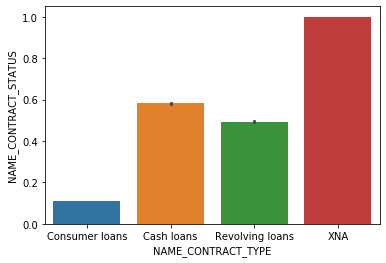

In [36]:
sns.barplot(x='NAME_CONTRACT_TYPE', y='NAME_CONTRACT_STATUS', data=df)
plt.show()

In [37]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='NAME_CONTRACT_STATUS', data=df)
    plt.show()

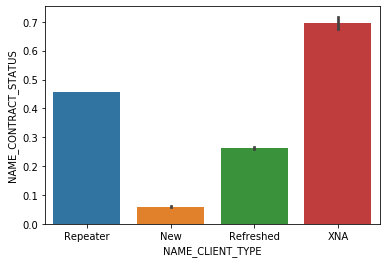

In [38]:
plot_cat('NAME_CLIENT_TYPE')

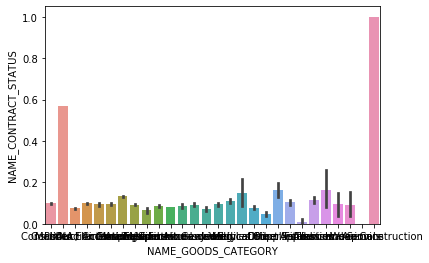

In [39]:
plot_cat('NAME_GOODS_CATEGORY')

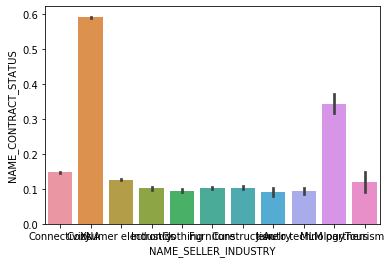

In [40]:
plot_cat('NAME_SELLER_INDUSTRY')

In [41]:
columns=['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT']

In [42]:
corrnum=df[columns].corr()

In [43]:
corrnum

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT
AMT_ANNUITY,1.000000,0.808856,0.816414,0.267749
AMT_APPLICATION,0.808856,1.000000,0.975765,0.482427
AMT_CREDIT,0.816414,0.975765,1.000000,0.299967
AMT_DOWN_PAYMENT,0.267749,0.482427,0.299967,1.000000


# some more analysis especially on application_data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\LENOVO\Downloads\application_data.csv')

In [45]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [47]:
#checking for mussing values
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [48]:
round(data.isnull().sum()/len(data.index), 2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     14.0
AMT_REQ_CREDIT_BUREAU_WEEK    14.0
AMT_REQ_CREDIT_BUREAU_MON     14.0
AMT_REQ_CREDIT_BUREAU_QRT     14.0
AMT_REQ_CREDIT_BUREAU_YEAR    14.0
Length: 122, dtype: float64

In [49]:
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 90]
print(missing_columns)

Index([], dtype='object')


In [50]:
print(data.shape)

(307511, 122)


In [51]:
100*(data.isnull().sum()/len(data.index))

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [52]:
data.isnull().sum(axis=1)

0          1
1          2
2         48
3         56
4         50
          ..
307506     8
307507    10
307508     4
307509    30
307510    17
Length: 307511, dtype: int64

In [53]:
data = data.drop(missing_columns, axis=1)
print(data.shape)

(307511, 122)


In [54]:
#to find imbalance
100*data['TARGET'].value_counts(normalize =True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [55]:
#univariate analysis

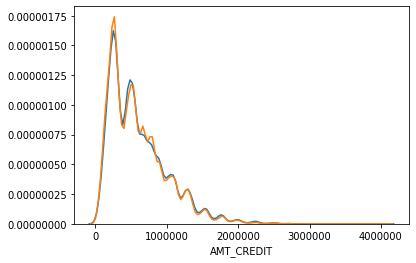

In [56]:
sex= ['M','F']
for i in sex:
    subset = data[data['CODE_GENDER']==i]
    sns.distplot(subset['AMT_CREDIT'], hist=False)

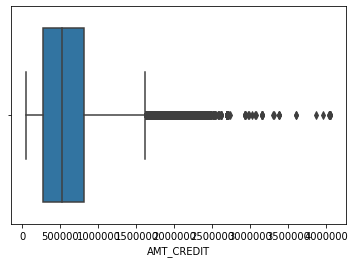

In [57]:
sns.boxplot(data['AMT_CREDIT'])

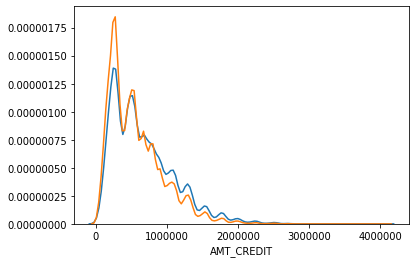

In [58]:
car= ['Y','N']
for i in car:
    subset = data[data['FLAG_OWN_CAR']==i]
    sns.distplot(subset['AMT_CREDIT'], hist=False)

In [59]:
#Bivariate analysis

In [60]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [61]:
num_loan = data[['AMT_INCOME_TOTAL' , 'AMT_CREDIT' ,'AMT_ANNUITY','AMT_GOODS_PRICE']]

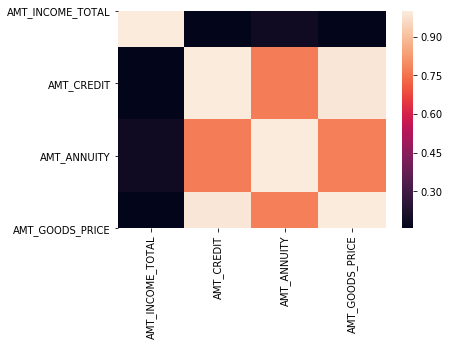

In [62]:
corr_matrix = num_loan.corr()
sns.heatmap(corr_matrix)

In [63]:
corr_matrix.unstack().reset_index()

,level_0,level_1,0
0,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,1.000000
1,AMT_INCOME_TOTAL,AMT_CREDIT,0.156870
2,AMT_INCOME_TOTAL,AMT_ANNUITY,0.191657
3,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.159610
4,AMT_CREDIT,AMT_INCOME_TOTAL,0.156870
5,AMT_CREDIT,AMT_CREDIT,1.000000
6,AMT_CREDIT,AMT_ANNUITY,0.770138
7,AMT_CREDIT,AMT_GOODS_PRICE,0.986968
8,AMT_ANNUITY,AMT_INCOME_TOTAL,0.191657
9,AMT_ANNUITY,AMT_CREDIT,0.770138
